<a href="https://colab.research.google.com/github/5starkarma/face_smoothing/blob/master/face_smoothing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
% cd /content/drive/My\ Drive/Colab Notebooks/face-smoothing

/content/drive/My Drive/Colab Notebooks/face-smoothing


In [2]:
import os

import cv2
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (6.0,6.0)
matplotlib.rcParams['image.cmap'] = 'gray'

from detectors.detect_faces import detect_face
from utils.image import load_image, save_image

In [3]:
# Directories
model_dir = os.path.join(os.getcwd(), 'models/')
img_dir = os.path.join(os.getcwd(), 'data/images/')
output_dir = os.path.join(os.getcwd(), 'data/output/')

# Filenames
output = 'output_no_bbox'
output_with_bbox = 'output_with_bbox'

# Model files
model_file = model_dir + 'opencv_face_detector_uint8.pb'
config_file = model_dir + 'opencv_face_detector.pbtxt'

output_with_bbox


/content/drive/My Drive/Colab Notebooks/face-smoothing/data/output/output_with_bbox{}.jpg
/content/drive/My Drive/Colab Notebooks/face-smoothing/data/output/output_with_bbox0.jpg
True


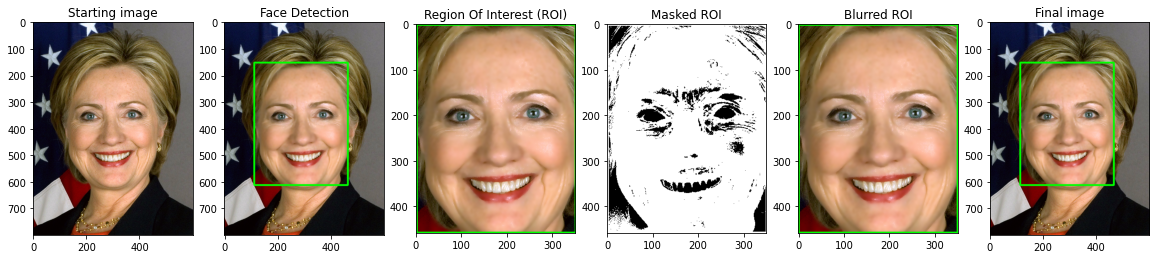

In [4]:
# Load the network
net = cv2.dnn.readNetFromTensorflow(model_file, config_file)

# Input image
input_file = os.path.join(img_dir, 'hillary_clinton.jpg')

# Load image
img = load_image(input_file)

# Set network confidence threshold
conf = 0.6

# Detect face
box_face, bboxes = detect_face(net, input_file, conf)

# Draw box around Region Of Interest
roi_img = box_face[bboxes[0][1]:bboxes[0][3], bboxes[0][0]:bboxes[0][2]]

# Copy ROI
temp_img = roi_img.copy()

# Convert roi_img to HSV colorspace
hsv_img = cv2.cvtColor(roi_img, cv2.COLOR_BGR2HSV)

# Get the mask for calculating histogram of the object and remove noise
mask = cv2.inRange(hsv_img, np.array((0.,80.,80.)), np.array((200.,255.,255.)))

# make a 3 channel mask
full_mask = cv2.merge((mask, mask, mask))

# Copy ROI
roi_copy = roi_img.copy()

# Apply blur on the created image
blurred_img = cv2.bilateralFilter(roi_copy,9,75,75)

# Apply mask to image
masked_img = cv2.bitwise_and(blurred_img, full_mask)

# Invert mask
inverted_mask = cv2.bitwise_not(full_mask)

# Created anti-mask
masked_img2 = cv2.bitwise_and(temp_img, inverted_mask)

# Add the masked images together
full_img = cv2.add(masked_img2, masked_img)

# Replace ROI on full image with blurred ROI
box_face[bboxes[0][1]:bboxes[0][3], bboxes[0][0]:bboxes[0][2]] = full_img

# Save final image with bbox
img_saved = save_image(output_dir, output_with_bbox, box_face)

# Display images
plt.figure(figsize=(20,20))
plt.subplot(1,6,1)
plt.title("Starting image")
plt.imshow(img[:,:,::-1])
plt.subplot(1,6,2)
plt.title("Face Detection")
plt.imshow(box_face[:,:,::-1])
plt.subplot(1,6,3)
plt.title("Region Of Interest (ROI)")
plt.imshow(roi_img[:,:,::-1])
plt.subplot(1,6,4)
plt.title("Masked ROI")
plt.imshow(mask)
plt.subplot(1,6,5)
plt.title("Blurred ROI")
plt.imshow(full_img[:,:,::-1])
plt.subplot(1,6,6)
plt.title("Final image")
plt.imshow(box_face[:,:,::-1])
plt.show()